#EXTRACCION DE DATOS,
bajamos la data del lugar de interes
lo guardamos y subimos a drive, para poder extraer a este cuaderno colaboratory.

#Poblematica
**La problemática principal es que Telecom X está experimentando una alta tasa de evasión de clientes y necesitan identificar las razones detrás de esto. Como analista de datos, tu tarea es analizar los datos proporcionados, limpiarlos y realizar un análisis exploratorio para ayudar al equipo de ciencia de datos a predecir y entender por qué los clientes se están yendo.**

#Leemos el documento
**1.-nos conectamos a las bibliotecas**
**2.-creamos el dataframe con una variable**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_telcom = pd.read_json('/content/drive/MyDrive/reto2_ecomerce_alura-oracle/TelecomX_Data.json')
df_telcom.head()
#Nos damos cuenta que  costumer, phone, internet, account, tienen información  anidadadatos_telcom =

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#Visualizamos los datos anidados

In [3]:
df_telcom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df_telcom.head(4)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df_telcom.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

#TRANSFORMACIÓN DE LA DATA

1.-Desanidamos las columnas
2.-Juntamos la información que viene en cada columna
3.-Trasformamos a numericos int o float
4.-Quiramos espacios, comas, etc en los str
5.-Quitamos duplicados
6.-Checamos si hay null y Nan
7.-Modificamos los nombres de columa a español
8.-Modificamos nombre mas corto columna tiempo
9.-Transformamos yes-1, No-0
10.-Data frame listo


In [6]:
#desanidamos
df_customer = pd.json_normalize(df_telcom['customer'])
df_phone = pd.json_normalize(df_telcom['phone'])
df_internet = pd.json_normalize(df_telcom['internet'])
df_account = pd.json_normalize(df_telcom['account'])


In [7]:
#juntamos toda la data
df_normalizados = pd.concat([
    df_telcom[['customerID', 'Churn']],  # Incluyo las columnas importantes originales
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)
df_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
#convertimos a numerico
print(df_normalizados.columns.tolist())


['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [10]:
#Quitamos espacios, ponemos puntos
df_normalizados.columns = df_normalizados.columns.str.replace('.', '_', regex=False)
df_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
df_normalizados['Charges_Total'] = pd.to_numeric(df_normalizados['Charges_Total'], errors='coerce')
df_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [12]:
df_normalizados.shape


(7267, 21)

##Vemos si hay duplicados

In [13]:
df_normalizados.duplicated().sum()


np.int64(0)

In [14]:
df_normalizados = df_normalizados.drop_duplicates()



#Información de dataframe
sabemos que tenemos 7267 filas y 19 columnas ya desanidando los datos de las columnas : customer,	phone,	internet,	account, y las dos columnas que no tenian información anidad CustomerID y Churn, hay 12 valores nulos en la columna Charges_Total, que aproximadamente representa un 0.15% de los datos, luego checamos duplicados y encontramos que habia 264 por lo que se eliminaron y con ello se fueron los null

#Verificamos los null si hay  eliminamos null

In [15]:
df_normalizados.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


##no hay null pero es posible que lo hubiera cuando los duplicados aun estaban, dejare la forma de eliminar como ejemplo los null
en este caso digamos que los null estaban en esta columna por loque eliminamos y luego verificamos     df_normalizados = df_normalizados.dropna(subset=['Charges_Total'])  verificamos usando df_normalizados['Charges_Total'].isnull().sum()
df_normalizados.shape


In [16]:
print(df_normalizados['Charges_Total'].dtype)


float64


In [17]:
print(df_normalizados['Charges_Monthly'].dtype)

float64


In [18]:
print(df_normalizados['Partner'].value_counts())


Partner
No     3749
Yes    3518
Name: count, dtype: int64


In [19]:
print(df_normalizados['Contract'].unique())
#vamos a unificar los formatos de escritura de esta columna

['One year' 'Month-to-month' 'Two year']


In [20]:
df_normalizados['Contract'] = df_normalizados['Contract'].str.strip().str.lower()
df_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,one year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,month-to-month,Yes,Mailed check,83.9,267.40


In [21]:
df_normalizados['Contract'] = df_normalizados['Contract'].map({
    'one year': '1 year',
    'month-to-month': 'month-to-month',
    'two year': '2 year'
})


In [22]:
print(df_normalizados['Contract'].unique())
print(df_normalizados['Contract'].value_counts())


['1 year' 'month-to-month' '2 year']
Contract
month-to-month    4005
2 year            1743
1 year            1519
Name: count, dtype: int64


In [23]:
print(df_normalizados['InternetService'].unique())

['DSL' 'Fiber optic' 'No']


In [24]:
df_normalizados['InternetService'] = df_normalizados['InternetService'].str.strip().str.lower()


In [25]:
df_normalizados['InternetService'] = df_normalizados['InternetService'].map({
    'dsl': 'dsl',
    'fiber optic': 'fiber_optic',
    'no': 'no'
})


In [26]:
print(df_normalizados['InternetService'].unique())
print(df_normalizados['InternetService'].value_counts())


['dsl' 'fiber_optic' 'no']
InternetService
fiber_optic    3198
dsl            2488
no             1581
Name: count, dtype: int64


In [27]:
print(df_normalizados['PaymentMethod'].unique())


['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [28]:
df_normalizados['PaymentMethod'] = df_normalizados['PaymentMethod'].str.strip().str.lower()


In [29]:
# Limpieza básica (por si hubiera espacios)
df_normalizados['PaymentMethod'] = df_normalizados['PaymentMethod'].str.strip().str.lower()

# pasamos a nombres más cortos
df_normalizados['PaymentMethod'] = df_normalizados['PaymentMethod'].map({
    'mailed check': 'mailed_check',
    'electronic check': 'electronic_check',
    'credit card (automatic)': 'credit_card',
    'bank transfer (automatic)': 'bank_transfer'
})


In [30]:
print(df_normalizados['PaymentMethod'].unique())
print(df_normalizados['PaymentMethod'].value_counts())


['mailed_check' 'electronic_check' 'credit_card' 'bank_transfer']
PaymentMethod
electronic_check    2445
mailed_check        1665
bank_transfer       1589
credit_card         1568
Name: count, dtype: int64


#ESTADISTICA DESCRIPIVA
 para detectar valores fuera de rango

In [31]:
print(df_normalizados.columns.tolist())


['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total']


In [32]:
cols = df_normalizados.columns.tolist()

replacements = {
    'Seniorcitizen': 'Senior_Citizen',
    'Phoneservice': 'Phone_Service',
    'Multiplelines': 'Multiple_Lines',
    'Internetservice': 'Internet_Service',
    'Onlinesecurity': 'Online_Security',
    'Onlinebackup': 'Online_Backup',
    'Deviceprotection': 'Device_Protection',
    'Techsupport': 'Tech_Support',
    'Streamingtv': 'Streaming_TV',
    'Streamingmovies': 'Streaming_Movies',
    'Paperlessbilling': 'Paperless_Billing',
    'Paymentmethod': 'Payment_Method',
    'Chargesmonthly': 'Charges_Monthly',
    'Chargestotal': 'Charges-Total'
}

cols_corrected = [replacements.get(c, c) for c in cols]

df_normalizados.columns = cols_corrected


print(df_normalizados.columns.tolist())



['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total']


#LOAD
**Guardamos la data limpia **

In [64]:
#descarg
df_normalizados.to_csv('/content/drive/MyDrive/reto2_ecomerce_alura-oracle/TelecomX_Data_Limpio.csv', index=False)



In [34]:
#lo descargare a mi maquina
from google.colab import files
files.download('/content/TelecomX_Data_Limpio.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# En esta parte cree el repositorio guit guithub
para poder trabajar directmente guardar los cambios

 crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [35]:
#creando la variable  dia en mes
dias_en_mes = 30

In [36]:
#hacemos calculo y creamos columna
df_normalizados['Charges_day'] = df_normalizados['Charges_Monthly'] / dias_en_mes
df_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_day
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,dsl,...,No,Yes,Yes,No,1 year,Yes,mailed_check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,dsl,...,No,No,No,Yes,month-to-month,No,mailed_check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,fiber_optic,...,Yes,No,No,No,month-to-month,Yes,electronic_check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,fiber_optic,...,Yes,No,Yes,Yes,month-to-month,Yes,electronic_check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,fiber_optic,...,No,Yes,Yes,No,month-to-month,Yes,mailed_check,83.9,267.40,2.796667


In [37]:
# comprovamos imprimiendo si se creeo o no la columna(* dejamos en ingles para no confundirnos)
print(df_normalizados.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Charges_day'],
      dtype='object')


#ESTANDARIZACIÓN Y TRASFORMACION DE DATOS

In [38]:
#se usa cuando no sabemos cuales columnas contienen el formato SI,NO, si sabemos cual es solo se ponene los nombres de las columnas
columnas_si_no = []

for col in df_normalizados.columns:
    valores_unicos = df_normalizados[col].dropna().unique()
    if set(['Sí', 'No']).issubset(set(valores_unicos)):
        columnas_si_no.append(col)


In [39]:
# Ahora aplica la transformación
for col in columnas_si_no:
    df_normalizados[col] = df_normalizados[col].replace({'Sí': 1, 'No': 0}).fillna(-1)

In [40]:
print(df_normalizados.head())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             dsl  ...               No   
1          Yes           Yes             dsl  ...               No   
2          Yes            No     fiber_optic  ...              Yes   
3          Yes            No     fiber_optic  ...              Yes   
4          Yes            No     fiber_optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No          1 year     

In [41]:
# Lista de columnas que tienen "Yes"/"No"
columnas_si_no = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn',]

# Reemplazar "Yes" por 1 y "No" por 0 en esas columnas
for col in columnas_si_no:
    df_normalizados[col] = df_normalizados[col].replace({'Yes': 1, 'No': 0})




<ipython-input-41-8aea1beb122d>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizados[col] = df_normalizados[col].replace({'Yes': 1, 'No': 0})


In [42]:
df_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_day
0,0002-ORFBO,0,Female,0,1,1,9,1,0,dsl,...,0,1,1,0,1 year,1,mailed_check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed_check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,fiber_optic,...,1,0,0,0,month-to-month,1,electronic_check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,fiber_optic,...,1,0,1,1,month-to-month,1,electronic_check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,fiber_optic,...,0,1,1,0,month-to-month,1,mailed_check,83.9,267.40,2.796667


#pasamos los nombres de las columnas a idioma español

In [43]:
traduccion_columnas = {
    'gender': 'Género',
    'SeniorCitizen': 'Ciudadano_Senior',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antigüedad_meses',
    'PhoneService': 'Servicio_Teléfono',
    'MultipleLines': 'Líneas_Múltiples',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_En_Línea',
    'OnlineBackup': 'Respaldo_En_Línea',
    'DeviceProtection': 'Protección_Dispositivo',
    'TechSupport': 'Soporte_Técnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Películas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Facturación_Sin_Papel',
    'PaymentMethod': 'Método_de_Pago',
    'Charges_Monthly': 'Facturación_Mensual',
    'Charges_Total': 'Facturación_Total',
    'Charges_day': 'Facturación_Diaria'
}

df_normalizados = df_normalizados.rename(columns=traduccion_columnas)


In [44]:
print(df_normalizados.columns)


Index(['customerID', 'Churn', 'Género', 'Ciudadano_Senior', 'Pareja',
       'Dependientes', 'Antigüedad_meses', 'Servicio_Teléfono',
       'Líneas_Múltiples', 'Servicio_Internet', 'Seguridad_En_Línea',
       'Respaldo_En_Línea', 'Protección_Dispositivo', 'Soporte_Técnico',
       'Streaming_TV', 'Streaming_Películas', 'Contrato',
       'Facturación_Sin_Papel', 'Método_de_Pago', 'Facturación_Mensual',
       'Facturación_Total', 'Facturación_Diaria'],
      dtype='object')


In [45]:
# Reemplazar comas, símbolos de dólar y espacios
df_normalizados['Facturación_Diaria'] = df_normalizados['Facturación_Diaria'].replace({'\$': '', ',': '', ' ': ''}, regex=True)

# Convertir a número, forzando errores a NaN
df_normalizados['Facturación_Diaria'] = pd.to_numeric(df_normalizados['Facturación_Diaria'], errors='coerce')
#
df_normalizados['Churn'] = pd.to_numeric(df_normalizados['Churn'], errors='coerce')

In [46]:
df_normalizados.head()

,customerID,Churn,Género,Ciudadano_Senior,Pareja,Dependientes,Antigüedad_meses,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,...,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Streaming_Películas,Contrato,Facturación_Sin_Papel,Método_de_Pago,Facturación_Mensual,Facturación_Total,Facturación_Diaria
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,dsl,...,0,1,1,0,1 year,1,mailed_check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed_check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,fiber_optic,...,1,0,0,0,month-to-month,1,electronic_check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,fiber_optic,...,1,0,1,1,month-to-month,1,electronic_check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,fiber_optic,...,0,1,1,0,month-to-month,1,mailed_check,83.9,267.40,2.796667


#Analisis descriptivo

In [47]:
# Estadísticas descriptivas generales para columnas numéricas
print(df_normalizados.describe())


             Churn  Ciudadano_Senior       Pareja  Dependientes  \
count  7043.000000       7267.000000  7267.000000   7267.000000   
mean      0.265370          0.162653     0.484106      0.300124   
std       0.441561          0.369074     0.499782      0.458343   
min       0.000000          0.000000     0.000000      0.000000   
25%       0.000000          0.000000     0.000000      0.000000   
50%       0.000000          0.000000     0.000000      0.000000   
75%       1.000000          0.000000     1.000000      1.000000   
max       1.000000          1.000000     1.000000      1.000000   

       Antigüedad_meses  Servicio_Teléfono  Facturación_Sin_Papel  \
count       7267.000000        7267.000000            7267.000000   
mean          32.346498           0.902711               0.593230   
std           24.571773           0.296371               0.491265   
min            0.000000           0.000000               0.000000   
25%            9.000000           1.000000         

#Distribución de avasión

In [48]:
print(df_normalizados.columns)


Index(['customerID', 'Churn', 'Género', 'Ciudadano_Senior', 'Pareja',
       'Dependientes', 'Antigüedad_meses', 'Servicio_Teléfono',
       'Líneas_Múltiples', 'Servicio_Internet', 'Seguridad_En_Línea',
       'Respaldo_En_Línea', 'Protección_Dispositivo', 'Soporte_Técnico',
       'Streaming_TV', 'Streaming_Películas', 'Contrato',
       'Facturación_Sin_Papel', 'Método_de_Pago', 'Facturación_Mensual',
       'Facturación_Total', 'Facturación_Diaria'],
      dtype='object')


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-50-71acd53858bd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.values, y=labels, palette=custom_palette)


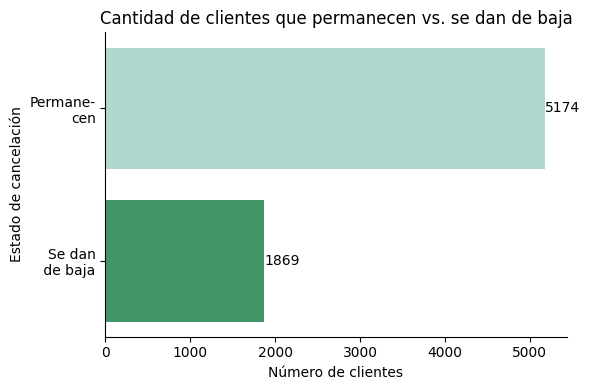

In [50]:


# Calcular los valores de churn
churn_counts = df_normalizados['Churn'].value_counts()
labels = ['Permane-\ncen' if x == 0 else 'Se dan\n de baja' for x in churn_counts.index]

# Usar paleta BuGn con dos colores
custom_palette = sns.color_palette('BuGn', n_colors=2)

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.values, y=labels, palette=custom_palette)

# Quitar contorno
sns.despine()

# Título y etiquetas
plt.xlabel('Número de clientes')
plt.ylabel('Estado de cancelación')
plt.title('Cantidad de clientes que permanecen vs. se dan de baja')

# Añadir etiquetas numéricas
for i, v in enumerate(churn_counts.values):
    plt.text(v + 5, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()







#Distribución de la evasión

In [51]:
#  variables categóricas
categorical_vars = ['Género', 'Contrato', 'Método_de_Pago']


In [52]:
# Tabla cruzada con totales
tabla_cruzada = pd.crosstab(df_normalizados['Género'], df_normalizados['Churn'], margins=True)
print(tabla_cruzada)


Churn    0.0   1.0   All
Género                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


In [53]:
# Tabla cruzada con porcentajes por fila
porcentajes = pd.crosstab(df_normalizados['Género'], df_normalizados['Churn'], normalize='index') * 100
print(porcentajes.round(1))

Churn    0.0   1.0
Género            
Female  73.1  26.9
Male    73.8  26.2


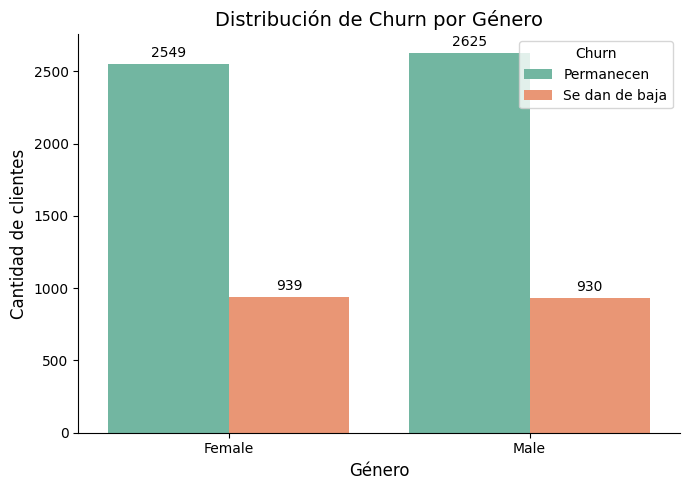

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df_normalizados, x='Género', hue='Churn', palette=['#66c2a5', '#fc8d62'])

# Agregar los valores en las barras
for c in ax.containers:
    ax.bar_label(c, fmt='%d', label_type='edge', padding=3)

plt.title('Distribución de Churn por Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.legend(title='Churn', labels=['Permanecen', 'Se dan de baja'])
sns.despine()  # Quitar contorno superior y derecho
plt.tight_layout()
plt.show()


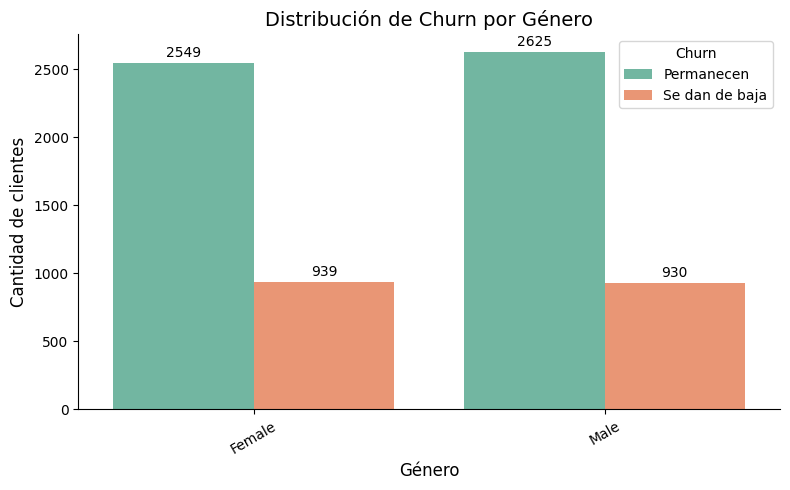

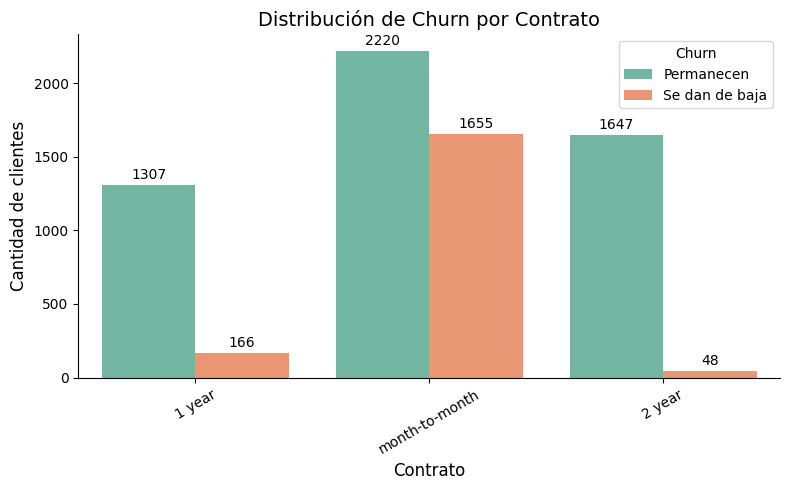

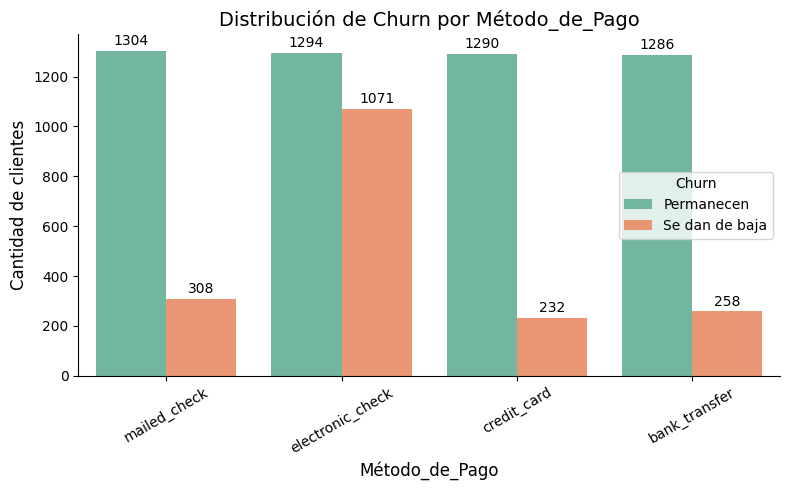

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas a analizar
categorical_vars = ['Género', 'Contrato', 'Método_de_Pago']

# Colores personalizados
palette = ['#66c2a5', '#fc8d62']  # Permanecen, Se dan de baja

for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df_normalizados, x=var, hue='Churn', palette=palette)

    # Mostrar valores sobre las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

    plt.title(f'Distribución de Churn por {var}', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Cantidad de clientes', fontsize=12)
    plt.xticks(rotation=30)
    plt.legend(title='Churn', labels=['Permanecen', 'Se dan de baja'])
    sns.despine()
    plt.tight_layout()
    plt.show()



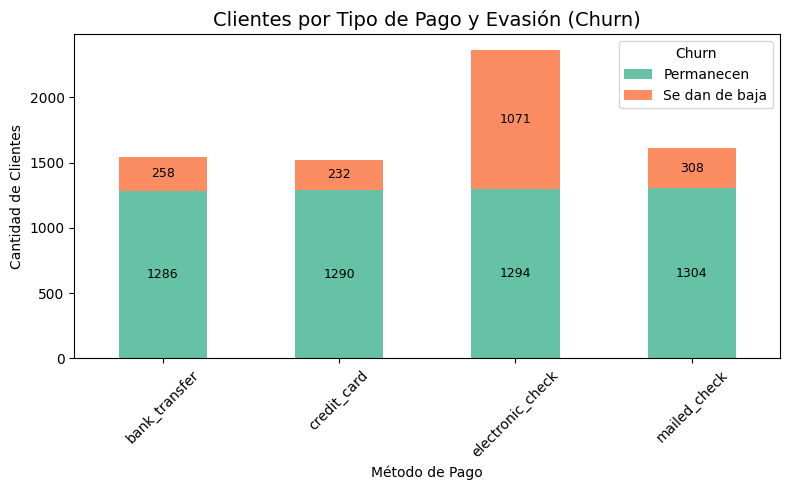

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Tabla cruzada: Método de pago vs Churn
pago_churn = pd.crosstab(df_normalizados['Método_de_Pago'], df_normalizados['Churn'])

# Paleta de colores unificada
palette = ['#66c2a5', '#fc8d62']  # Permanecen, Se dan de baja

# Crear gráfico de barras apiladas
ax = pago_churn.plot(kind='bar', stacked=True, figsize=(8, 5), color=palette)

# Títulos y ejes
plt.title('Clientes por Tipo de Pago y Evasión (Churn)', fontsize=14)
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn', labels=['Permanecen', 'Se dan de baja'])
plt.xticks(rotation=45)
plt.tight_layout()

# Añadir etiquetas de cantidad dentro de las barras
for i, (index, row) in enumerate(pago_churn.iterrows()):
    y_offset = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, y_offset + val / 2, str(val), ha='center', va='center', fontsize=9, color='black')
            y_offset += val

plt.show()






#Comparar variables numericas

<ipython-input-57-89275d794e4e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y=var, data=df_normalizados, palette=palette, showfliers=False, width=0.6)


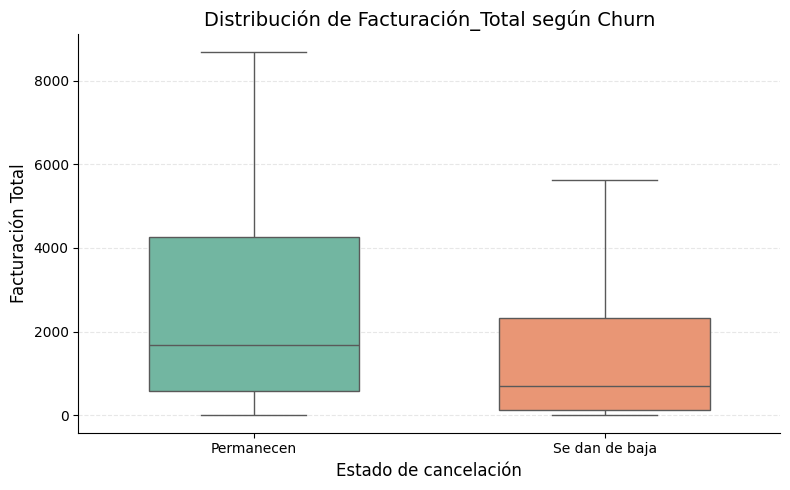

<ipython-input-57-89275d794e4e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y=var, data=df_normalizados, palette=palette, showfliers=False, width=0.6)


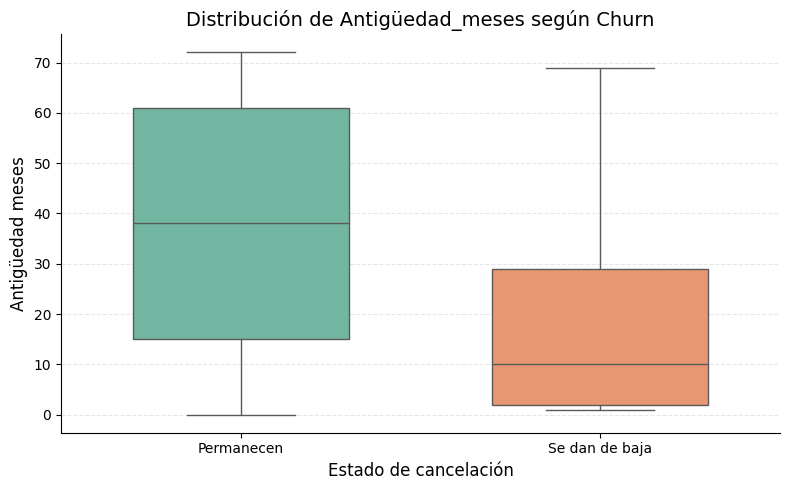

<ipython-input-57-89275d794e4e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y=var, data=df_normalizados, palette=palette, showfliers=False, width=0.6)


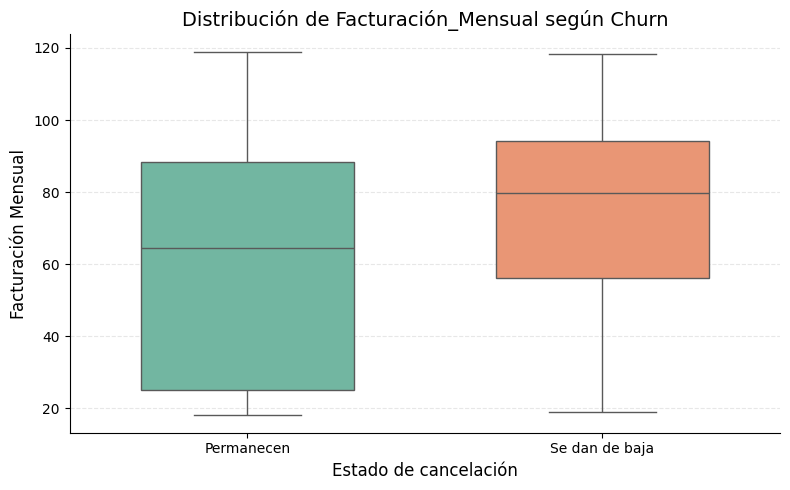

<ipython-input-57-89275d794e4e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Churn', y=var, data=df_normalizados, palette=palette, showfliers=False, width=0.6)


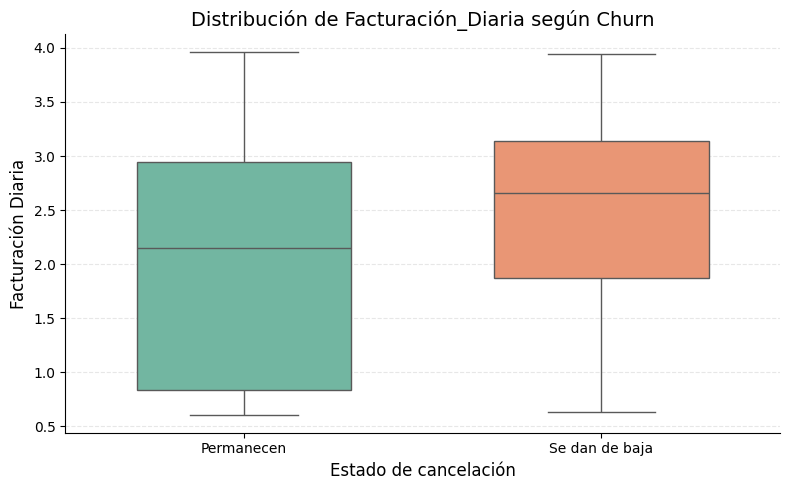

In [57]:
# Variables numéricas que quieres analizar
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas a graficar
numerical_vars = ['Facturación_Total', 'Antigüedad_meses', 'Facturación_Mensual', 'Facturación_Diaria']

# Colores personalizados
palette = ['#66c2a5', '#fc8d62']  # Permanecen, Se dan de baja

for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    ax = sns.boxplot(x='Churn', y=var, data=df_normalizados, palette=palette, showfliers=False, width=0.6)

    plt.title(f'Distribución de {var} según Churn', fontsize=14)
    plt.xlabel('Estado de cancelación', fontsize=12)
    plt.ylabel(var.replace('_', ' '), fontsize=12)
    plt.xticks([0, 1], ['Permanecen', 'Se dan de baja'])
    sns.despine()
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


#extra

In [58]:
# Seleccionamos solo las columnas numéricas
numerical_cols = df_normalizados.select_dtypes(include=['int64', 'float64']).columns

# Calculamos la matriz de correlación
corr_matrix = df_normalizados[numerical_cols].corr()

# Mostramos la matriz
print(corr_matrix)


                          Churn  Ciudadano_Senior    Pareja  Dependientes  \
Churn                  1.000000          0.150889 -0.150448     -0.164221   
Ciudadano_Senior       0.150889          1.000000  0.022970     -0.212952   
Pareja                -0.150448          0.022970  1.000000      0.448900   
Dependientes          -0.164221         -0.212952  0.448900      1.000000   
Antigüedad_meses      -0.352229          0.018187  0.377551      0.159892   
Servicio_Teléfono      0.011942          0.010060  0.018828     -0.003863   
Facturación_Sin_Papel  0.191825          0.157734 -0.011201     -0.111752   
Facturación_Mensual    0.193356          0.220388  0.097122     -0.115832   
Facturación_Total     -0.199484          0.103499  0.316918      0.063960   
Facturación_Diaria     0.193356          0.220388  0.097122     -0.115832   

                       Antigüedad_meses  Servicio_Teléfono  \
Churn                         -0.352229           0.011942   
Ciudadano_Senior            

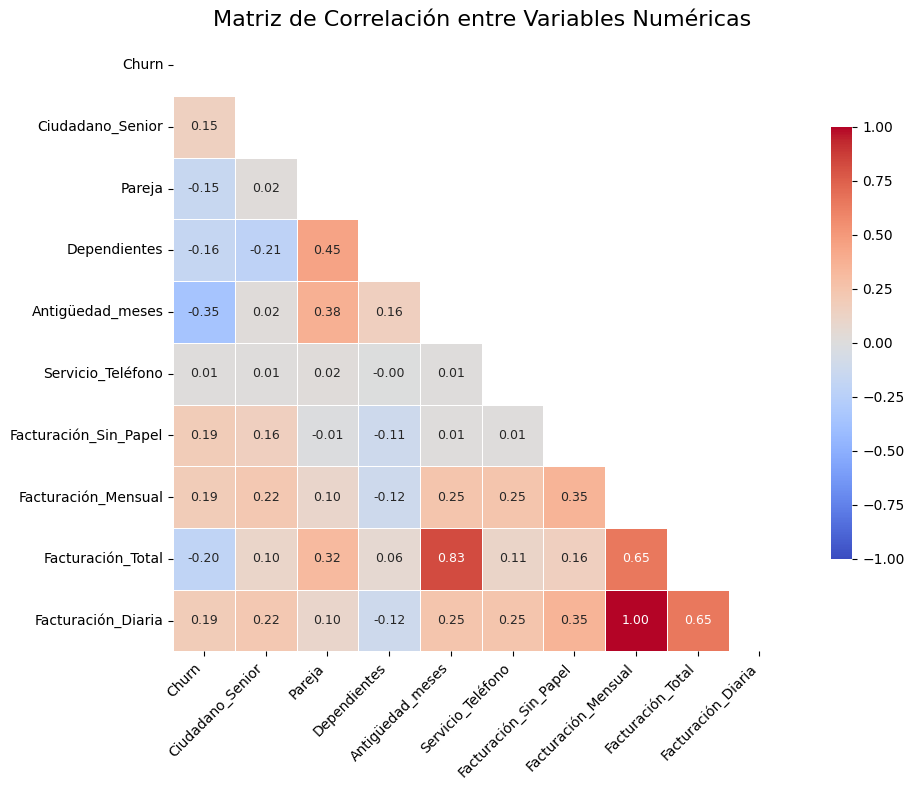

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Seleccionamos solo columnas numéricas
numerical_cols = df_normalizados.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_normalizados[numerical_cols].corr()

# Máscara para mostrar solo la mitad superior del mapa de calor
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.7},
    vmin=-1,
    vmax=1,
    annot_kws={"size": 9}
)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


#Interpretación
**La matriz de correlación permite identificarrelaciones importantes
entre las variables del conjunto de datos.**
**Conclusiones**
correlación positiva
1.-Relación entre servicios y facturación:
existe una fuerte crrelación positiva con un (0.80)
nos indica que a mayor numero de servicios contratados mayor ingreso por el cliente

2.-Relacion entre facturación diaria - facturación mensual
con un (0.65)
nos indica que puede ser un buen predictor  de commportaiento del gastos del clientes
correlación negativa
3.-curn-bin y cantidad de servicios con (-0.20)
y churn con facturación total (-0.15)
nos indica que los clientes  que usan mas servicios  o han generado mayor  facturación son menos propensos a cancelar.

poca o nula correlación

4.pareja, servicio_telefono muestra muy baja correlación


recomendacion:
estos resultados pueden ser utilizados para seleccionar variables relevantes en un modelo de predicción  de abandono priorisando las que tienen una relación significativa con churn
e incluso eliminar variables que no tienen relacion significativa.

In [60]:
print(df_normalizados['Facturación_Diaria'].unique()[:10])


[2.18666667 1.99666667 2.46333333 3.26666667 2.79666667 2.31333333
 3.65666667 2.82166667 1.60666667 3.015     ]


In [61]:
print(df_normalizados['Facturación_Diaria'].apply(type).value_counts())


Facturación_Diaria
<class 'float'>    7267
Name: count, dtype: int64


In [62]:
df_normalizados.head()

,customerID,Churn,Género,Ciudadano_Senior,Pareja,Dependientes,Antigüedad_meses,Servicio_Teléfono,Líneas_Múltiples,Servicio_Internet,...,Protección_Dispositivo,Soporte_Técnico,Streaming_TV,Streaming_Películas,Contrato,Facturación_Sin_Papel,Método_de_Pago,Facturación_Mensual,Facturación_Total,Facturación_Diaria
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,dsl,...,0,1,1,0,1 year,1,mailed_check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed_check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,fiber_optic,...,1,0,0,0,month-to-month,1,electronic_check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,fiber_optic,...,1,0,1,1,month-to-month,1,electronic_check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,fiber_optic,...,0,1,1,0,month-to-month,1,mailed_check,83.9,267.40,2.796667


In [63]:
# Reemplazamos valores de texto por binarios
df_normalizados[servicios_cols] = df_normalizados[servicios_cols].replace({
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
})


NameError: name 'servicios_cols' is not defined

In [ ]:
#para saber que servicios tiene
# Suponiendo que tienes columnas binarias 0/1 para servicios
servicios_cols = ['Servicio_Teléfono', 'Líneas_Múltiples', 'Seguridad_En_Línea', 'Respaldo_En_Línea', 'Protección_Dispositivo', 'Soporte_Técnico', 'Streaming_TV', 'Streaming_Películas']

# Crear una columna que sume los servicios activos
df_normalizados['Cantidad_Servicios'] = df_normalizados[servicios_cols].sum(axis=1)

# Visualizar la relación con churn
sns.boxplot(x='Churn', y='Cantidad_Servicios', data=df_normalizados)
plt.title('Cantidad de servicios contratados según evasión (Churn)')
plt.show()

In [ ]:
#checamos que las columnas sean vinarias
df_normalizados[servicios_cols] = df_normalizados[servicios_cols].replace({'Yes': 1, 'No': 0, 'No internet service': 0})



In [ ]:
plt.figure(figsize=(7, 5))
sns.violinplot(x='Churn', y='Cantidad_Servicios', data=df_normalizados, inner='box', palette='pastel')
plt.title('Distribución de servicios contratados por evasión (Churn)')
plt.xlabel('Churn (0 = permanece, 1 = baja)')
plt.ylabel('Cantidad de servicios')
plt.show()


In [ ]:
df_normalizados.groupby('Churn')['Cantidad_Servicios'].mean()


#INTERPRETASIÓN

La visualización sugiere que los clientes que mantienen más servicios contratados son menos propensos a darse de baja. Esto podría deberse a una mayor satisfacción o a un mayor nivel de compromiso con la empresa. Como estrategia de retención, fomentar la contratación de múltiples servicios (por ejemplo, a través de paquetes o beneficios cruzados) podría ser efectivo para reducir la evasión de clientes.

In [ ]:
#variables para el modelo basandonos en la matriz de correlación
# Definimos las variables predictoras y la variable objetivo
columnas = [
    'Cantidad_Servicios',
    'Facturación_Total',
    'Facturación_Mensual',
    'Facturación_Diaria',
    'Antigüedad_meses',
    'Streaming_Películas',
    'Streaming_TV',
    'Soporte_Técnico',
    'Seguridad_En_Línea',
    'Respaldo_En_Línea'
]

X = df_normalizados[columnas]
y = df_normalizados['Churn']



In [ ]:
df_normalizados.isna().sum()


In [ ]:
df_modelo = df_normalizados.dropna(subset=['Churn'])


In [ ]:
df_modelo['Facturación_Total'].fillna(df_modelo['Facturación_Total'].mean(), inplace=True)


In [ ]:
# checamos que no lo usamos pero para poder hacer el modelo lo bamos a ignorar
df_modelo = df_modelo.drop(columns=['Churn_label'], errors='ignore')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# 1. Eliminar filas donde Churn_bin esté vacío
df_modelo = df_normalizados.dropna(subset=['Churn'])

# 2. Rellenar NaN en 'Facturación_Total' con la media
df_modelo['Facturación_Total'].fillna(df_modelo['Facturación_Total'].mean(), inplace=True)

# 3. Eliminar columna mal escrita si existe
df_modelo = df_modelo.drop(columns=['Churn_label'], errors='ignore')

# 4.  columnas predictoras (ajusta la lista con las columnas correctas que quieras usar)
columnas = [
   'Cantidad_Servicios',
    'Facturación_Total',
    'Facturación_Mensual',
    'Facturación_Diaria',
    'Antigüedad_meses',
    'Streaming_Películas',
    'Streaming_TV',
    'Soporte_Técnico',
    'Seguridad_En_Línea',
    'Respaldo_En_Línea'

]

# 5. Separar X e y
X = df_modelo[columnas]
y = df_modelo['Churn']

# 6. División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Entrenar modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# 8. Predicciones
y_pred = modelo.predict(X_test)

# 9. Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


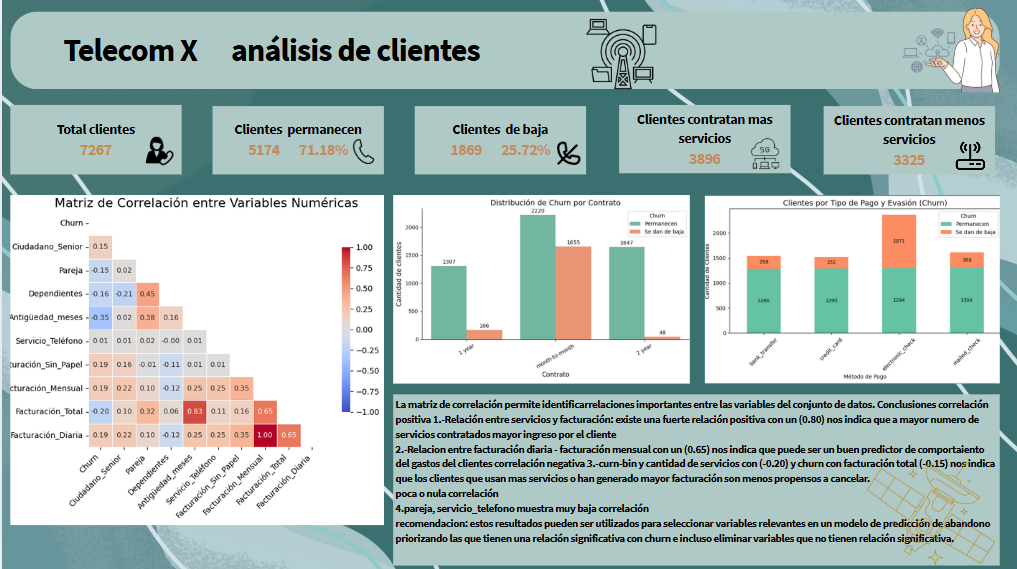